In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras 

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout,Activation
from tensorflow.keras.optimizers import Adam,Adagrad,Adadelta,Adamax,SGD
from tensorflow.keras.activations import sigmoid,relu,softmax
from tensorflow.keras.preprocessing.image import ImageDataGenerator   # for analysing the image 

In [3]:
path = 'D:\\projects_ME\\Deep learning\\Dog and cat classification\\archive'  # path for the data 


In [4]:
train_data_path = 'D:\\projects_ME\\Deep learning\\Dog and cat classification\\archive\\training_set\\training_set\\'
test_data_path = 'D:\\projects_ME\\Deep learning\\Dog and cat classification\\archive\\test_set\\test_set\\'

In [5]:
img_width , img_height = 150,150

In [6]:
from glob import glob
glob('D:\\projects_ME\\Deep learning\\Dog and cat classification\\archive\\training_set\\training_set\\*')

['D:\\projects_ME\\Deep learning\\Dog and cat classification\\archive\\training_set\\training_set\\cats',
 'D:\\projects_ME\\Deep learning\\Dog and cat classification\\archive\\training_set\\training_set\\dogs']

In [7]:
from glob import glob
glob('D:\\projects_ME\\Deep learning\\Dog and cat classification\\archive\\test_set\\test_set\\*')

['D:\\projects_ME\\Deep learning\\Dog and cat classification\\archive\\test_set\\test_set\\cats',
 'D:\\projects_ME\\Deep learning\\Dog and cat classification\\archive\\test_set\\test_set\\dogs']

In [8]:
labels = ['cats','dogs']

In [9]:
train_gen = ImageDataGenerator(rescale=1./255,
                               shear_range=0.2,
                               horizontal_flip=True,
                               zoom_range=0.2)
                               
                               
test_gen = ImageDataGenerator(rescale=1./255)

In [10]:
train = train_gen.flow_from_directory(train_data_path,target_size=(img_height,img_width),classes=labels,class_mode='binary',batch_size=32)
test = test_gen.flow_from_directory(test_data_path,target_size=(img_height,img_width),classes=labels,class_mode='binary',batch_size=32)



Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [11]:
model = Sequential()
model.add(Conv2D(128,kernel_size=(3,3),input_shape=(img_height,img_width,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dense(32,activation='relu'))
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 128)     3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 32)        0         
_________________________________________________________________
dense (Dense)                (None, 18, 18, 32)        1

In [13]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
epochs=2

In [15]:
model.fit(train,epochs=epochs,validation_data=test)

Epoch 1/2
251/251 [==============================] - 252s 1s/step - loss: 0.6805 - accuracy: 0.5597 - val_loss: 0.6410 - val_accuracy: 0.6253
Epoch 2/2
251/251 [==============================] - 238s 949ms/step - loss: 0.6353 - accuracy: 0.6379 - val_loss: 0.5897 - val_accuracy: 0.6742


In [16]:
model.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [17]:
train_loss = model.history.history['loss']
train_loss

[0.680496096611023, 0.635262668132782]

In [18]:
test_loss = model.history.history['val_loss']
test_loss

[0.6410192847251892, 0.5897457003593445]

In [19]:
train_acc = model.history.history['accuracy']
train_acc

[0.5596502423286438, 0.637851357460022]

In [20]:
test_acc = model.history.history['val_accuracy']
test_acc

[0.6253089308738708, 0.6742461919784546]

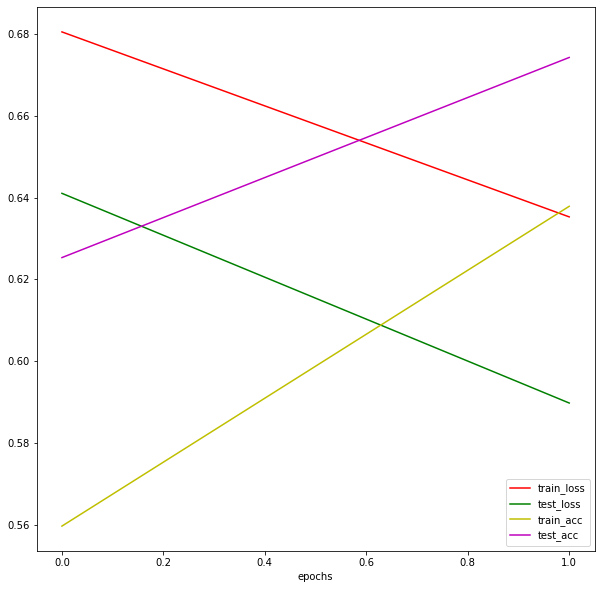

In [21]:
plt.figure(figsize=(10,10))
plt.plot(np.arange(epochs),train_loss,color='r',label='train_loss')
plt.plot(np.arange(epochs),test_loss,color='g',label='test_loss')
plt.plot(np.arange(epochs),train_acc,color='y',label='train_acc')
plt.plot(np.arange(epochs),test_acc,color='m',label='test_acc')
plt.legend()
plt.xlabel('epochs')
plt.show()


In [27]:
loss,acc = model.evaluate(test)

64/64 [==============================] - 4s 56ms/step - loss: 0.6932 - accuracy: 0.5007


In [28]:
print(loss)
print(acc)

0.693159282207489
0.5007414817810059


In [22]:
labels

['cats', 'dogs']

In [23]:
from tensorflow.keras.preprocessing import image

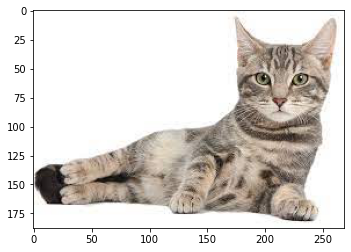

In [24]:
img = plt.imread('./11.jpg')
plt.imshow(img)

In [25]:
img = image.load_img('./11.jpg')
img_arr = image.img_to_array(img)
print(img_arr)

[[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [254. 254. 254.]
  [254. 254. 254.]
  [255. 254. 252.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [254. 254. 254.]
  [254. 254. 254.]
  [255. 254. 252.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [254. 254. 254.]
  [254. 254. 254.]
  [255. 254. 252.]]

 ...

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]]


In [26]:
kamal = image.load_img('./11.jpg')
img_arr = image.img_to_array(kamal,)
print(img_arr.shape)
print('------------------------>')
a = np.expand_dims(img_arr,axis=0)  # rows 
print(a.shape)

(188, 269, 3)
------------------------>
(1, 188, 269, 3)


(150, 150, 3)
------------------------>
(1, 150, 150, 3)
------------->
result =  [[0.]]
------------------->
probability value =  [[0.]]
----------------------
classes =  [[0]]
res =  cat


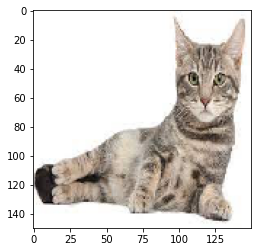

In [36]:
kamal = image.load_img('./11.jpg',target_size=(img_width,img_height))
plt.imshow(kamal)
img_arr = image.img_to_array(kamal)
print(img_arr.shape)
print('------------------------>')
a = np.expand_dims(img_arr,axis=0)  # rows 
print(a.shape)
print('------------->')
result = model.predict(a)
print("result = ",result)
print('------------------->')
print("probability value = ",model.predict_proba(a))
print('----------------------')
c = model.predict_classes(a)
print('classes = ',model.predict_classes(a))
if c[0] > 0.5:
    print("res = ",'dog')
else:
    print('res = ','cat')

[[0.]]
[[0.]]
[[0]]



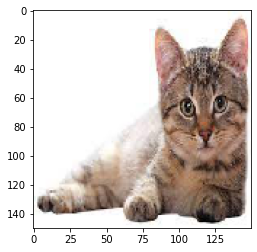

In [46]:
kamal = image.load_img('./1.jpg',target_size=(img_width,img_height))
plt.imshow(kamal)
img_arr = image.img_to_array(kamal)
c = np.expand_dims(img_arr,axis=0)
result = model.predict(c)  # predict -> probability [0.06]
print(result)
if result > 0.05:
    print('dog')
else:
    print('cat')

In [32]:
import matplotlib.pyplot as plt 

In [42]:
image_pred = image.load_img('./archive/test_set/test_set/cats/cat.4008.jpg',target_size=(img_height,img_width))
image_pred = image.img_to_array(image_pred)
print(image_pred)
print(image_pred.shape)

[[[ 39.  28.  10.]
  [ 52.  38.  25.]
  [ 27.  10.   0.]
  ...
  [  9.  11.   6.]
  [  7.   9.   4.]
  [  5.  12.   5.]]

 [[ 40.  33.  15.]
  [ 45.  35.  25.]
  [ 24.  11.   3.]
  ...
  [ 14.  16.  11.]
  [  7.   9.   4.]
  [  5.  12.   5.]]

 [[  9.   7.   0.]
  [ 19.  16.   7.]
  [ 18.  10.   8.]
  ...
  [ 11.  13.   8.]
  [ 13.  15.  10.]
  [  6.  11.   4.]]

 ...

 [[ 15.  13.  16.]
  [ 14.  12.  13.]
  [ 17.  16.  14.]
  ...
  [ 19.  21.  20.]
  [ 87.  89.  88.]
  [135. 150. 145.]]

 [[ 15.  13.  16.]
  [ 14.  12.  13.]
  [ 12.  11.   9.]
  ...
  [ 21.  23.  22.]
  [ 13.  15.  14.]
  [ 16.  25.  22.]]

 [[ 19.  17.  20.]
  [ 18.  16.  17.]
  [ 14.  13.  11.]
  ...
  [ 18.  20.  19.]
  [ 16.  18.  17.]
  [  9.  13.  12.]]]
(150, 150, 3)


In [43]:
a = np.expand_dims(image_pred,axis=0)
a.shape
print(a)

[[[[ 39.  28.  10.]
   [ 52.  38.  25.]
   [ 27.  10.   0.]
   ...
   [  9.  11.   6.]
   [  7.   9.   4.]
   [  5.  12.   5.]]

  [[ 40.  33.  15.]
   [ 45.  35.  25.]
   [ 24.  11.   3.]
   ...
   [ 14.  16.  11.]
   [  7.   9.   4.]
   [  5.  12.   5.]]

  [[  9.   7.   0.]
   [ 19.  16.   7.]
   [ 18.  10.   8.]
   ...
   [ 11.  13.   8.]
   [ 13.  15.  10.]
   [  6.  11.   4.]]

  ...

  [[ 15.  13.  16.]
   [ 14.  12.  13.]
   [ 17.  16.  14.]
   ...
   [ 19.  21.  20.]
   [ 87.  89.  88.]
   [135. 150. 145.]]

  [[ 15.  13.  16.]
   [ 14.  12.  13.]
   [ 12.  11.   9.]
   ...
   [ 21.  23.  22.]
   [ 13.  15.  14.]
   [ 16.  25.  22.]]

  [[ 19.  17.  20.]
   [ 18.  16.  17.]
   [ 14.  13.  11.]
   ...
   [ 18.  20.  19.]
   [ 16.  18.  17.]
   [  9.  13.  12.]]]]


In [32]:
result = model.predict_classes(a)
result

array([[0]])

In [33]:
prob = model.predict_proba(a)
prob

array([[0.]], dtype=float32)

In [34]:
print('prediction class',result)
print('probability:{}'.format(prob[0]))

prediction class [[0]]
probability:[0.]


In [35]:
0.5 > 0.40450403

True

In [62]:

def fun(path):
    a = plt.imread(path)
    plt.imshow(a)
    
    image_pred = image.load_img(path,target_size=(img_height,img_width))
    image_pred = image.img_to_array(image_pred)
    a = np.expand_dims(image_pred,axis=0)
    result = model.predict_classes(a)
    prob = model.predict_proba(a)
    print('prediction class',result)
    print('probability:{}'.format(prob[0]))
    if result[0]==0:
        print('Predicted_result = cat')
    else:
        print('Predicted_result = dog')

    
#print('predicition_class:',k)

prediction class [[0]]
probability:[0.40450403]
Predicted_result = cat


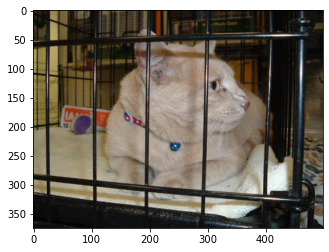

In [63]:
fun('./archive/test_set/test_set/cats/cat.4008.jpg')

prediction class [[0]]
probability:[0.49988452]
Predicted_result = cat


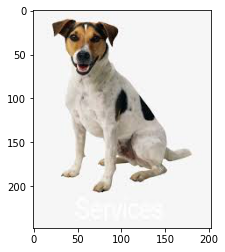

In [64]:
fun('./download (3).jpg')

prediction class [[0]]
probability:[0.49988452]
Predicted_result = cat


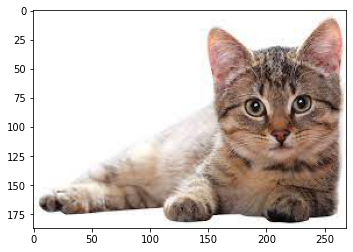

In [65]:
fun('./1.jpg')

prediction class [[0]]
probability:[0.49988452]
Predicted_result = cat


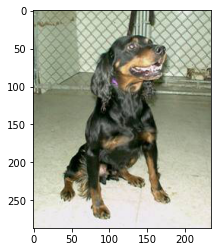

In [66]:
fun('./archive/test_set/test_set/dogs/dog.4032.jpg')